# Задание 9.5. Модуль ML-6 (HW-03)

## Загрузка необходимых модулей

In [1127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import RFE
# from sklearn.preprocessing import OneHotEncoder as OHE
# import category_encoders as ce

## Получение данных, предобработка и деление

In [1128]:
# %%capture
# !wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

**Изучаем данные**

In [1129]:
# data = pd.read_excel('data_ford_price.xlsx') # Оригинальный путь из задания
data = pd.read_excel('data/data_ford_price.xlsx') # Мой путь в папке data

display(data.head()) # Информация о датасете
display(data.info())

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


None

In [1130]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

col_names = ['year', 'weather', 'odometer']
x = data[col_names]

data[col_names] = scaler.fit_transform(x.values)

# data['wear'] = data['weather']+data['year']
# Шуточный признак, который увеличивает точность,
# но только потому, что увеличивает вес двух
# важнейших признаков: возраст авто и пройденные мили.

**Смотрим, можно ли перекодировать объекты.**

In [1131]:
# Через OneHotEncoder точность не увеличилась

# display(data['title_status'].value_counts())
# display(data['transmission'].value_counts())
# display(data['drive'].value_counts())
# display(data['size'].value_counts())

# encoder = ce.OneHotEncoder(cols=['title_status', 'transmission', 'drive', 'size']) # указываем столбец для кодирования
# encoding_data = encoder.fit_transform(data[['title_status', 'transmission', 'drive', 'size']])
# data = pd.concat([data.drop(['title_status', 'transmission', 'drive', 'size'], axis=1), encoding_data], axis=1)
# data.head()

In [1132]:
# Смотрим значения этих признаков

display(data['title_status'].value_counts())
display(data['transmission'].value_counts())
display(data['drive'].value_counts())
display(data['size'].value_counts())

# encoder = ce.OneHotEncoder(cols=['title_status', 'transmission', 'drive', 'size']) # указываем столбец для кодирования
# encoding_data = encoder.fit_transform(data[['title_status', 'transmission', 'drive', 'size']])
# data = pd.concat([data.drop(['title_status', 'transmission', 'drive', 'size'], axis=1), encoding_data], axis=1)
data.head()

clean      6657
rebuilt     151
lien        144
salvage      59
missing       6
Name: title_status, dtype: int64

automatic    6708
manual        275
other          34
Name: transmission, dtype: int64

4wd    4888
rwd    1653
fwd      85
Name: drive, dtype: int64

full-size      4570
mid-size        867
compact          15
sub-compact       1
Name: size, dtype: int64

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,0.666667,4,6,-0.881459,clean,automatic,4wd,full-size,36.471500,-82.483400,0.571429
1,15490,-0.111111,2,8,-0.235083,clean,automatic,4wd,full-size,40.468826,-74.281734,0.071429
2,2495,-0.888889,2,8,0.991529,clean,automatic,4wd,full-size,42.477134,-82.949564,-0.428571
3,1300,-1.111111,1,8,0.618855,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,-0.142857
4,13865,0.000000,3,8,0.568653,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


In [1133]:
# Заменяем их по словарю.

data['title_status'] = data['title_status'].\
    replace({'clean': 4, 'rebuilt': 3, 'lien': 2, 'salvage': 1, 'missing': 0})
data['transmission'] = data['transmission'].\
    replace({'automatic': 2, 'manual': 1, 'other': 0})
data['drive'] = data['drive'].\
    replace({'4wd': 2, 'rwd': 1, 'fwd': 0})
data['size'] = data['size'].\
    replace({'full-size': 4, 'mid-size': 3, 'compact': 2, 'sub-compact': 1})

display(data.head(1))

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,0.666667,4,6,-0.881459,4,2,2.0,4.0,36.4715,-82.4834,0.571429


In [1134]:
# data = data[['price','year', 'cylinders', 'odometer', 'lat', 'long', 'weather']]
data.dropna(inplace = True)

display('Информация о типах данных в столбцах', data.columns.to_series().groupby(data.dtypes).groups)

# Выделение целевого признака в отдельную переменную
X = data.drop(columns='price')
y = data['price']

# Разделение выборок на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

'Информация о типах данных в столбцах'

{int64: ['price', 'condition', 'cylinders', 'title_status', 'transmission'], float64: ['year', 'odometer', 'drive', 'size', 'lat', 'long', 'weather']}

## Функция обучения модели

In [1135]:
# Так как для тестов нам придётся повторять
# обучение и тест MAE много раз, можно сделать
# для этого команду.

# Переданы только меняющиеся переменные
def get_mae(X_train=X_train, X_test=X_test):
    # Присваиваем модели тип, линейную регрессию, и обучаем её.
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Делаем предсказания и проверяем их точность с помощью MAE,
    # целевой признак указан в долларах США.
    mae = mean_absolute_error(y_test, model.predict(X_test))
    return 'MAE: %.3f' % mae

In [1136]:
# Проверка.
baseline = get_mae()
print('Baseline', baseline)

Baseline MAE: 4393.121


## Анализ корреляции признаков и удаление лишнего

<AxesSubplot:>

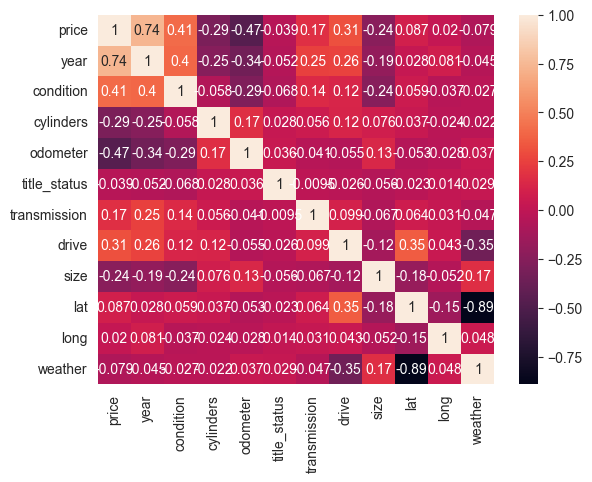

In [1137]:
# Оцениваем корреляцию признаков
sns.heatmap(data.corr(), annot=True)

In [1138]:
# Заметна высокая корреляция погоды и географической широты.
# Интересно, почему вдруг? :b Следует удалить один из них.
# Их совпадение будет мешать работе. Но какой?
display(X['lat'][0:3], X['weather'][0:3])

0    36.471500
1    40.468826
2    42.477134
Name: lat, dtype: float64

0    0.571429
1    0.071429
2   -0.428571
Name: weather, dtype: float64

In [1139]:
# Признак weather это целые числа. С ними проще работать.
# Удаляем широту, переводим weather в int.
X['weather'] = X['weather'].astype('int')
X.drop('lat', axis = 1, inplace = True)

In [1140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [1141]:
print(X_train.head())

          year  condition  cylinders  odometer  title_status  transmission  \
6170 -0.555556          2          8  0.488920             4             2   
6212  0.666667          3          6 -1.332990             4             2   
55    0.444444          3          6 -0.627705             4             2   
1682  0.444444          4          6 -0.603415             4             2   
3027 -0.333333          3          8  0.082822             4             2   

      drive  size        long  weather  
6170    2.0   4.0  -88.269936        0  
6212    1.0   3.0 -117.177630        0  
55      2.0   3.0  -87.753580        0  
1682    1.0   4.0  -94.871900        0  
3027    2.0   4.0  -73.191419        0  


In [1142]:
after_drop = get_mae(X_train, X_test)
print('After drop', after_drop)
# Убрав признаки-спутники, маргинально улучшили
# результат предсказания.

After drop MAE: 4393.355


## Оценка значимости признаков при помощи RFE и SelectKBest

In [1143]:
# Оценка путём линейной регрессии
estimator = LinearRegression()

**RFE, рекурсивный отбор признаков**

In [1144]:
# Создаём выборщик RFE
# Количество топ-признаков = 3
selector_RFE = RFE(estimator, n_features_to_select=3, step=1)
selector_RFE = selector_RFE.fit(X_train, y_train)

# Информация о том, что есть,
# и что RFE выбрал
print(X_train.columns)
print(selector_RFE.get_feature_names_out())
print(selector_RFE.ranking_)

Index(['year', 'condition', 'cylinders', 'odometer', 'title_status',
       'transmission', 'drive', 'size', 'long', 'weather'],
      dtype='object')
['year' 'drive' 'size']
[1 5 3 2 6 7 1 1 8 4]


In [1145]:
X_train_RFE, X_test_RFE = X_train[selector_RFE.get_feature_names_out()],\
    X_test[selector_RFE.get_feature_names_out()]
get_mae(X_train_RFE, X_test_RFE)

RFE_selection = get_mae(X_train_RFE, X_test_RFE)
print('RFE selection', RFE_selection)

RFE selection MAE: 5153.971


**SelectKBest**

In [1146]:
from sklearn.feature_selection import SelectKBest, f_regression, chi2, f_classif

In [1147]:
# Создаём выборщик SelectKBest
# Количество топ-признаков = 3
selector_SKB = SelectKBest(f_regression, k=3)
selector_SKB.fit(X_train, y_train)

print(X_train.columns)
print(selector_SKB.get_feature_names_out())

Index(['year', 'condition', 'cylinders', 'odometer', 'title_status',
       'transmission', 'drive', 'size', 'long', 'weather'],
      dtype='object')
['year' 'condition' 'odometer']


In [1148]:
X_train_SKB, X_test_SKB = X_train[selector_SKB.get_feature_names_out()],\
    X_test[selector_SKB.get_feature_names_out()]

In [1149]:
SKB_selection = get_mae(X_train_SKB, X_test_SKB)
print('SelectKBest selection', SKB_selection)

SelectKBest selection MAE: 4660.119


## Итоги

In [1150]:
print('Baseline', baseline)
print('After drop', after_drop)
print('RFE selection', RFE_selection)
print('SelectKBest selection', SKB_selection)

Baseline MAE: 4393.121
After drop MAE: 4393.355
RFE selection MAE: 5153.971
SelectKBest selection MAE: 4660.119


С кодированием признаков object в int.

Baseline MAE: 4393.121

After drop MAE: 4393.355

RFE selection MAE: 5153.971

SelectKBest selection MAE: 4660.119

Без кодирования признаков object в int.

Baseline MAE: 4682.957

After drop MAE: 4672.930

RFE selection MAE: 5113.445

SelectKBest selection MAE: 4708.946

## Выводы

В данном случае вышло смешно. Оговорённое задачей число признаков ухудшает результат, делая MAE значительно выше. Конечно, меняя алгоритм селекции можно добиться немного лучших результатов, но проблему это не снимает. Если выбрать, допустим, четыре признака или больше, точность только вырастет.

Алгоритм – вещь хорошая, но нельзя просто бросить ей данные, параметры и ожидать успешного прогноза. В моём случае – а я "от балды" закодировал object простыми числами – выборщик RFE стал хуже прогнозировать, при этом выбрав мой столбец **drive** вместо одного из исходных. Почему? Потому что этот столбец определял успех общего прогноза ТОЛЬКО в соотношении с другими, а сам по себе оказался менее неинформативен.

Влияет ли привод на цену авто? Да. Как влияет и выброшенная ради него погода (средняя температура?). Оставленный во влажной среде внедорожник придёт в негодность куда быстрее, чем в сухом климате Невады. Путём перебора, оба алгоритма выбирают лучший вариант при минимуме признаков, но это не гарантирует лучший результат.

Это лишь инструмент исследователя, с помощью которого, методом перебора селекторов и K, он может увидеть новые взаимосвязи и глубже понять влияние признаков на исход предсказания.

Найти не только прямые зависимости одного от другого, но то, как признаки ко-влияют на результат.

Этот инструмент предоставляет разработчику дополнительные догадки о том, как можно улучшить модель.

**Вопрос: «Какой метод отбора признаков показал наилучший результат на тестовой выборке?»**

Ответ: Интересны оба случая, но RFE проигрывает SKB. Наверное, дело в том, как по-разному они работают. SKB считывает результаты по всем корреляциям и разом убирает все, кроме трёх сильнейших. RFE итеративно убивает по одному слабейшему признаку за проход, пока не останется три. ~~Ну или так я, гуманитарий, понял.~~

Их различие можно легко увидеть на графике ниже.

In [1151]:
graph = {"RFE": [], "SKB": [], 'pos': []}


for i in range(1, 11):
    selector_RFE = RFE(estimator, n_features_to_select=i, step=1)
    selector_RFE = selector_RFE.fit(X_train, y_train)

    X_train_RFE, X_test_RFE = X_train[selector_RFE.get_feature_names_out()],\
        X_test[selector_RFE.get_feature_names_out()]
    
    selector_SKB = SelectKBest(f_regression, k=i)
    selector_SKB.fit(X_train, y_train)
    
    X_train_SKB, X_test_SKB = X_train[selector_SKB.get_feature_names_out()],\
        X_test[selector_SKB.get_feature_names_out()]
    
    graph['RFE'].append(float(get_mae(X_train_RFE, X_test_RFE)[5:]))
    graph['SKB'].append(float(get_mae(X_train_SKB, X_test_SKB)[5:]))
    graph['pos'].append(i)

graph = pd.DataFrame(graph)

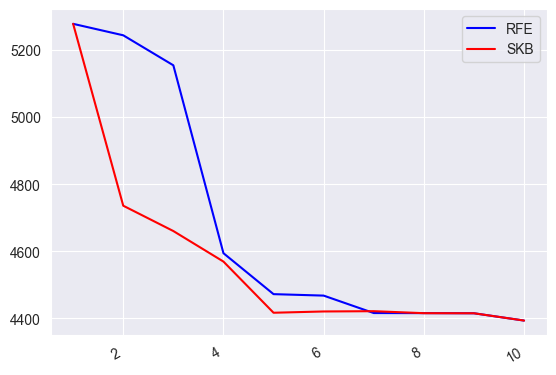

In [1152]:
f, ax = plt.subplots(1, 1)
x_col='K'
y_col = 'MAE'

ax.plot(graph["pos"], graph['RFE'], color="blue", label="RFE", linestyle="-")
ax.plot(graph["pos"], graph['SKB'], color="red", label="SKB", linestyle="-")

ax.legend()

plt.gcf().autofmt_xdate()
plt.show()

Как мы видим, на десяти селекциях MAE у SKB меньше или равен MAE RFE.

С одним признаком они равны. А вот ко второму SKB ныряет вниз диаграмы, а RFE запаздывает на два признака, и догоняет только к семи признакам. Это может быть вызвано тем, что в процессе убийства признаков по одному, у RFE изменяется представление о наших признаках и их соотношении, почему в итоге изначально выигрышные признаки могут впоследствие быть исключены.

Следовательно, в нашем случае, селекция признаков через SKB на отрезке [1:6] будет побеждать.